In [1]:
import jaydebeapi
import time
from pathlib import Path

In [2]:
def token():
    home = str(Path.home())
    with open(home + '/.databrickscfg', 'r') as f:
        raw = f.read()
    f.closed
    return raw.split('\n')[2].split('token = ')[-1]

In [3]:
conn = jaydebeapi.connect("org.apache.hive.jdbc.HiveDriver",
                          "jdbc:hive2://dbc-caf9527b-e073.cloud.databricks.com:443/default;transportMode=http;ssl=true;httpPath=sql/protocolv1/o/0/0517-153657-brand38",
                          ["token", token()],
                          str(Path.home()) + "/Downloads/uber-hive-jdbc-1.2.1.jar",)

In [4]:
start = time.time()
cursor = conn.cursor()
cursor.arraysize = 10000

In [5]:
cursor.execute("select enroll_count,unenroll_count,unix_timestamp(window_end) from delta.`/delta/enrollment_aggregates_delta` where experiment_id='Awesome Bar Improved History Search' order by window_end desc")

In [6]:
fetchStart = time.time()
res = cursor.fetchall()
end = time.time()

In [7]:
# res

In [8]:
cursor.close()
conn.close()

In [9]:
executeDrationSeconds = fetchStart - start
fetchDurationSeconds = fetchStart - start
print("Query execution duration: ", executeDrationSeconds)
print("Result fetch duration: ", fetchDurationSeconds)

Query execution duration:  62.61205744743347
Result fetch duration:  62.61205744743347


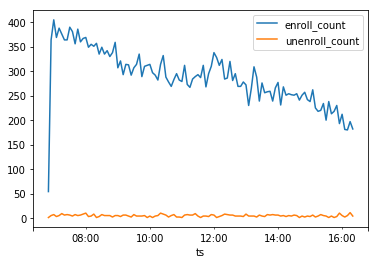

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(data=res, columns=['enroll_count','unenroll_count','window_end'])
df["ts"] = pd.to_datetime(df["window_end"], unit='s')
df.set_index('ts', inplace=True)
df = df.drop('window_end', 1)
plot = df.plot(kind='line')